In [3]:
import cv2

# Callback function to capture mouse clicks
def get_pixel_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button click
        print(f"Clicked at: [{x}, {y}]")

# Load the image
img = cv2.imread('pre.png')

# Display the image in a window
cv2.imshow("Image", img)

# Set mouse callback function
cv2.setMouseCallback("Image", get_pixel_coordinates)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


Clicked at: [244, 46]
Clicked at: [24, 35]
Clicked at: [6, 394]
Clicked at: [288, 370]


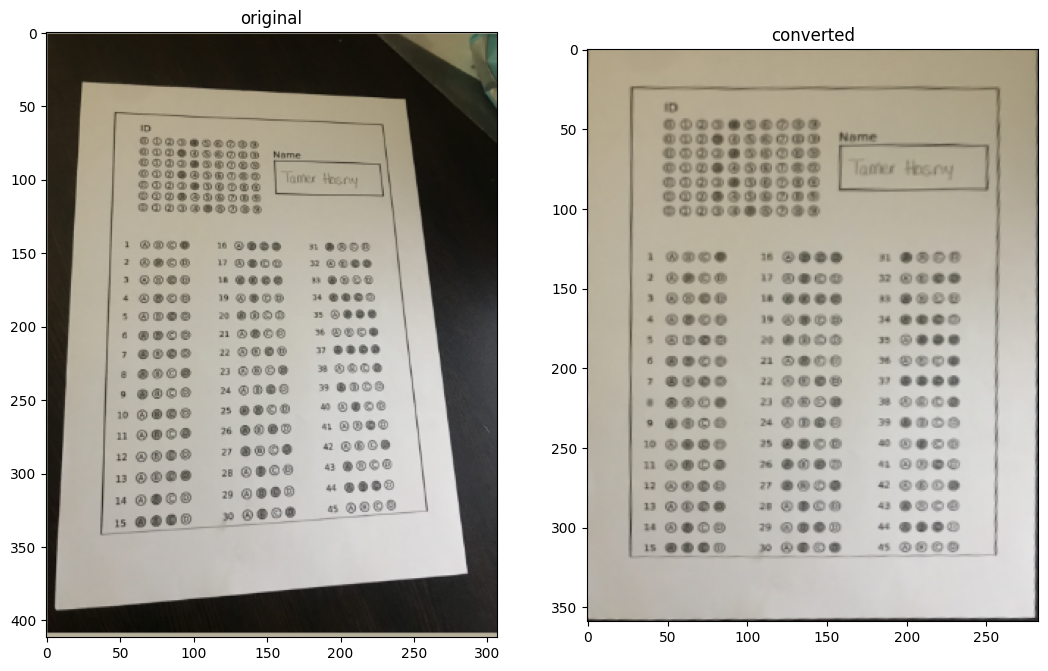

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from commonfunctions import *


# Load the image
img = cv2.imread('pre.png') 
 
# Create a copy of the image
img_copy = np.copy(img)
 
# Convert to RGB so as to display via matplotlib
# Using Matplotlib we can easily find the coordinates
# of the 4 points that is essential for finding the 
# transformation matrix
# All points are in format [cols, rows]
pt_A = [24, 35]
pt_B =  [6, 394]
pt_C = [288, 370]
pt_D = [244, 46]


# Here, I have used L2 norm. You can use L1 also.
width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))


height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))



input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])


# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)

out = cv2.warpPerspective(img,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)

images = [img, out]

titles = ["original", "converted"]

show_images(images, titles)


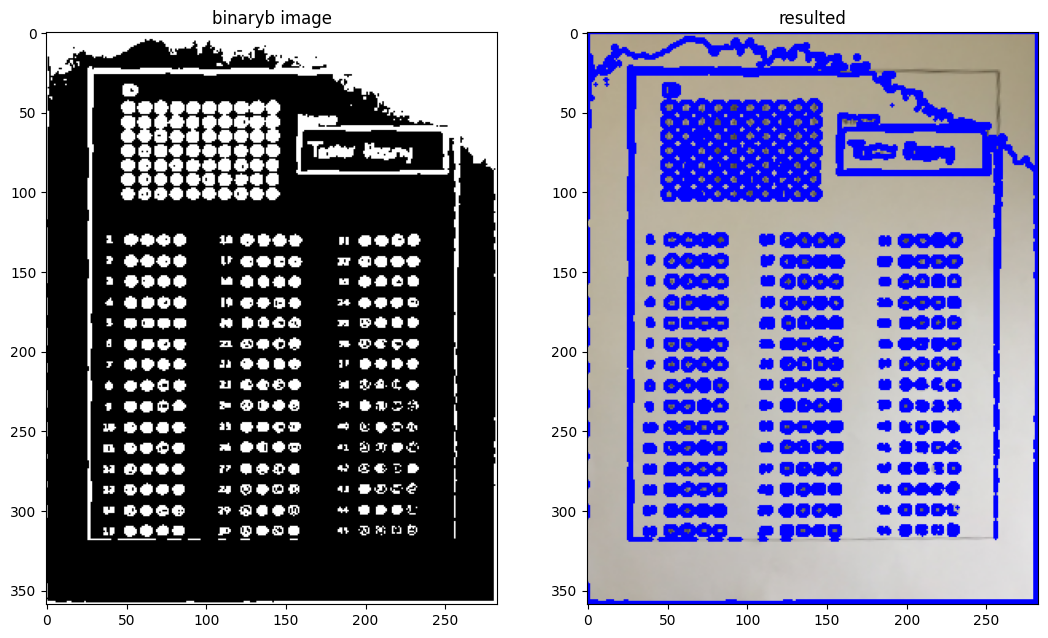

In [16]:
import cv2

out_copy = np.copy(out)

# Convert to grayscale
gray = cv2.cvtColor(out_copy, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_ , binary_image = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
binary_image = 255 - binary_image

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image in red
cv2.drawContours(out_copy, contours, -1, (0, 0, 255), 2)  # Red color in BGR, thickness = 2

# Display the image with contours
show_images([binary_image, out_copy], ["binaryb image", 'resulted'])


In [ ]:
def perspective_transform(img):
    if img is None:
        print(f"Error: Unable to load the image.")
    else:
        # Convert the image to grayscale
        binary_image=0
        if binary==0:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Apply thresholding to create a binary image
            _, binary_image = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
        else :
            binary_image=img
        # cf.show_images([binary_image])
        # Find contours in the binary image
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Find the largest contour based on area
        # print(len(contours))
        largest_contour = max(contours, key=cv2.contourArea)
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(largest_contour, True)
        approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)

        # Get the four corners of the polygon
        corners = approx_polygon.reshape(-1, 2)
        corners = sorted(corners, key=lambda x: x[1])
        # Separate the sorted corners into top and bottom
        top_corners = sorted(corners[:2], key=lambda x: x[0])
        bottom_corners = sorted(corners[2:], key=lambda x: x[0])

        # Concatenate the sorted corners
        sorted_corners = np.concatenate([bottom_corners, top_corners])

        # Define the destination points for the perspective transformation
        dst_points = np.float32([[0, img.shape[0]], [img.shape[1], img.shape[0]], [0, 0], [img.shape[1], 0]])

        # Calculate the perspective transformation matrix
        matrix = cv2.getPerspectiveTransform(sorted_corners.astype(np.float32), dst_points)

        # Apply the perspective transformation to the image
        warped_img = cv2.warpPerspective(img, matrix, (img.shape[1], img.shape[0]))
        height,width=[warped_img.shape[0],warped_img.shape[1]]
        zoom=25
        zoom2=40 if bubbleId else 40
        zoomed_in_image = warped_img[zoom2:height-zoom2, zoom:width-zoom]
        return zoomed_in_image